In [286]:
import pandas as pd

train = pd.read_csv('Datasets/Titanic/train.csv')
test = pd.read_csv('Datasets/Titanic/test.csv')

# 先查看训练与测试数据的基本信息，这是一个好习惯
# 可以对数据集有一个整体上的了解
# 查看哪些特征值有缺失
print(train.info())
print(test.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [242]:
train.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


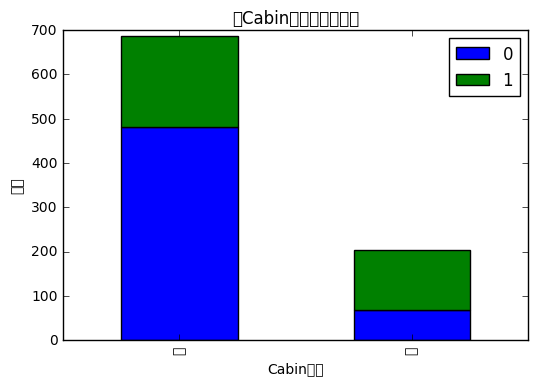

In [243]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

In [278]:
# Name的处理
# Master 代表男小孩儿
import re
pa_mr = re.compile('Mr\.|Rev\.|Sir\.|Major\.|Capt\.')
pa_mrs = re.compile('Mrs\.|Lady\.|Mme\.|Countess\.')
pa_miss = re.compile('Miss\.|Ms\.|Mlle\.')
pa_master = re.compile('Master\.')
pa_dr = re.compile('Dr\.')

def name_to_category(a, sex):
    if re.search(pa_mr, a):
        return 'Mr'
    elif re.search(pa_mrs, a):
        return 'Mrs'
    elif re.search(pa_miss, a):
        return 'Miss'
    elif re.search(pa_master, a):
        return 'Kids'
    elif re.search(pa_dr, a):
        if sex == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return 'Mr'
    
b = []
for a in zip(train['Name'], train['Sex']):
    b.append(name_to_category(a[0], a[1]))
 
# 增加一列'category'
train['Category'] = b

d = []
for c in zip(test['Name'], test['Sex']):
    d.append(name_to_category(c[0], c[1]))
test['Category'] = d

# 使用对应category的平均值
# 填充Age特征的缺失数据
# import math
# for ix, row in train.iterrows():
#     if math.isnan(row['Age']):
#         train.loc[ix, 'Age'] = train[train['Category']==row['Category']]['Age'].mean()
# for ix, row in test.iterrows():
#     if math.isnan(row['Age']):
#         test.loc[ix, 'Age'] = test[test['Category']==row['Category']]['Age'].mean()

In [280]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Category       418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [287]:
# 根据经验，人工选取对预测有效的特征
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp',
                    'Parch', 'Fare']
X_train = train.loc[:, selected_features]
X_test = test.loc[:, selected_features]
y_train = train['Survived']

# # 使用出现频率最高的值
# # 填充Embarked特征的缺失数据
# print(X_train.loc[:, 'Embarked'].value_counts())
# print(X_test.loc[:, 'Embarked'].value_counts())
# X_train.loc[:, 'Embarked'].fillna('S', inplace=True)
# X_test.loc[:, 'Embarked'].fillna('S', inplace=True)


X_train.loc[:, 'Age'].fillna(X_train.loc[:, 'Age'].mean(), inplace=True)
X_test.loc[:, 'Age'].fillna(X_test.loc[:, 'Age'].mean(), inplace=True)
X_test.loc[:, 'Fare'].fillna(X_test.loc[:, 'Fare'].mean(), inplace=True)

# 重新对处理后的训练数据和测试数据进行查验
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null object
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB
None


In [288]:
# 使用DictVector对特征向量化
# 即将键值对转换成向量
from sklearn.feature_extraction import DictVectorizer
dict_vec = DictVectorizer(sparse=False)
X_train = dict_vec.fit_transform(X_train.to_dict(orient='record'))
print(dict_vec.feature_names_)
X_test = dict_vec.fit_transform(X_test.to_dict(orient='record'))

['Age', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


In [298]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, n_estimators=200, min_samples_split=2, min_samples_leaf=2, oob_score=True)
# 实践得出参数中n_estimators和min_samples_leaf比较重要

# from xgboost import XGBClassifier
# xgbc = XGBClassifier()

from sklearn.cross_validation import cross_val_score
cross_val_score(rfc, X_train, y_train, cv=20).mean()
# cross_val_score(xgbc, X_train, y_train, cv=5).mean()

0.83182147562582354

In [299]:
rfc.fit(X_train, y_train)
rfc_y_predict = rfc.predict(X_test)
rfc_submission = pd.DataFrame({'PassengerId':test['PassengerId'],
                              'Survived':rfc_y_predict})
rfc_submission.to_csv('Datasets/Titanic/rfc_submission.csv', index=False)

In [291]:
# 利用随机森林评估各特征的重要性
features = dict_vec.get_feature_names()
importance = rfc.feature_importances_
for i in zip(features, importance):
    print(i)

('Age', 0.20489386411115826)
('Fare', 0.24762076984592804)
('Parch', 0.032284176827884217)
('Pclass', 0.10098759047589285)
('Sex=female', 0.20490827390855068)
('Sex=male', 0.1623094095716528)
('SibSp', 0.046995915258933076)


In [269]:
# 利用随机森林评估各特征的重要性
features = dict_vec.get_feature_names()
importance = rfc.feature_importances_
for i in zip(features, importance):
    print(i)

('Age', 0.20489386411115826)
('Fare', 0.24762076984592804)
('Parch', 0.032284176827884217)
('Pclass', 0.10098759047589285)
('Sex=female', 0.20490827390855068)
('Sex=male', 0.1623094095716528)
('SibSp', 0.046995915258933076)


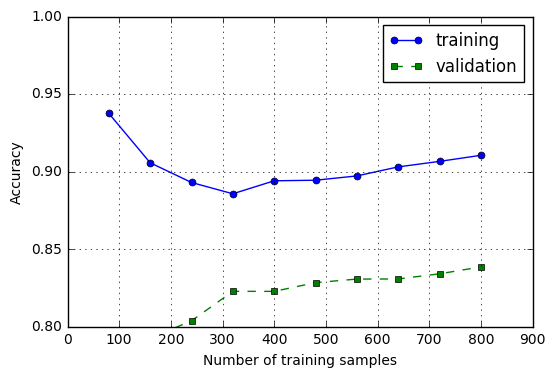

In [275]:
# 用学习曲线判断模型欠拟合还是过拟合
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                        X=X_train, 
                                                        y=y_train, 
                                                        train_sizes=np.linspace(0.1,1.0,10),
                                                        cv=10,
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
        markersize=5, label='validation')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.8, 1.0])
plt.show()

//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//an

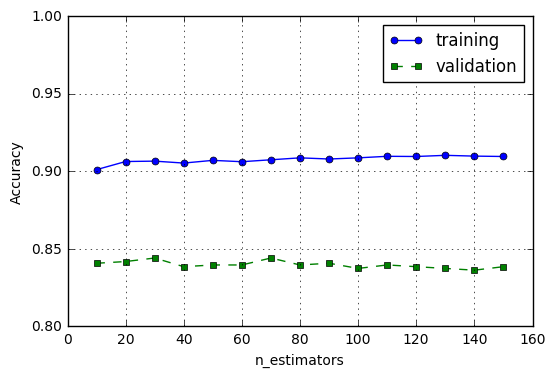

In [276]:
# 使用验证曲线调参
# rfc = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=3, min_samples_leaf=2)
from sklearn.learning_curve import validation_curve
param_range = np.linspace(10,150,15).astype(int)
train_scores, test_scores = validation_curve(estimator=rfc,
                                            X=X_train,
                                            y=y_train,
                                            param_name='n_estimators',
                                            param_range=param_range,
                                            cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s',
        markersize=5, label='validation')

plt.grid()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.8, 1.0])
plt.show()

In [77]:
# 通过网格搜索调参
# 实际上就是暴力穷举，也可以使用随机搜索RandomizedSearchCV类
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
# rfc = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=2, min_samples_leaf=2, oob_score=True)

rfc_g =RandomForestClassifier(random_state=1, n_estimators=120, oob_score=True)
param_grid = [{
                'min_samples_split':[2,3,4,5],
                'min_samples_leaf':[1,2,3,4,5]}]

gs = GridSearchCV(estimator=rfc_g,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8316498316498316
{'min_samples_leaf': 3, 'min_samples_split': 2}


array([ 0.83182148,  0.83518116,  0.83515591,  0.83518116,  0.83518116,
        0.83295894,  0.8340942 ,  0.83295784,  0.8340942 ,  0.8340942 ])